## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.5, 0,2, 0.1]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-MOMENTUM-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8660 - acc: 0.3322 - val_loss: 1.9697 - val_acc: 0.3059
Epoch 2/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6499 - acc: 0.4152 - val_loss: 1.6243 - val_acc: 0.4233
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5614 - acc: 0.4478 - val_loss: 1.5831 - val_acc: 0.4248
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5025 - acc: 0.4671 - val_loss: 1.6599 - val_acc: 0.4177
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4478 - acc: 0.4879 - val_loss: 1.5137 - val_acc: 0.4556
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4049 - acc: 0.5036 - val_loss: 1.5599 - val_acc: 0.4362
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.3638 - acc: 0.5166 - val_loss: 1.5602 - val_acc

50000/50000 [==============================] - 2s 45us/step - loss: 1.8086 - acc: 0.3609 - val_loss: 1.7952 - val_acc: 0.3573
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7366 - acc: 0.3877 - val_loss: 1.8133 - val_acc: 0.3445
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6834 - acc: 0.4069 - val_loss: 1.6562 - val_acc: 0.4144
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6411 - acc: 0.4214 - val_loss: 1.7636 - val_acc: 0.3837
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6134 - acc: 0.4328 - val_loss: 1.6469 - val_acc: 0.4209
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5878 - acc: 0.4412 - val_loss: 1.6474 - val_acc: 0.4107
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5531 - acc: 0.4543 - val_loss: 1.5556 - val_acc: 0.4484
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 45us/step - loss: 1.8384 - acc: 0.3546 - val_loss: 1.8554 - val_acc: 0.3418
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7928 - acc: 0.3689 - val_loss: 1.7975 - val_acc: 0.3668
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7595 - acc: 0.3803 - val_loss: 1.9010 - val_acc: 0.3252
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7245 - acc: 0.3941 - val_loss: 1.7679 - val_acc: 0.3705
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6970 - acc: 0.4031 - val_loss: 1.7184 - val_acc: 0.3924
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6764 - acc: 0.4119 - val_loss: 1.6976 - val_acc: 0.3897
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6591 - acc: 0.4172 - val_loss: 1.6752 - val_acc: 0.4099
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 45us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.

Epoch 3/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7941 - acc: 0.3674 - val_loss: 1.8251 - val_acc: 0.3486
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7455 - acc: 0.3869 - val_loss: 1.7280 - val_acc: 0.3890
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7115 - acc: 0.3973 - val_loss: 1.7105 - val_acc: 0.3898
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6809 - acc: 0.4090 - val_loss: 1.6963 - val_acc: 0.3978
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6557 - acc: 0.4188 - val_loss: 1.7322 - val_acc: 0.3904
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6294 - acc: 0.4292 - val_loss: 1.7253 - val_acc: 0.3820
Epoch 9/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6102 - acc: 0.4347 - val_loss: 1.6237 - val_acc: 0.4294
Epoch 10/50
50000/50000 [================

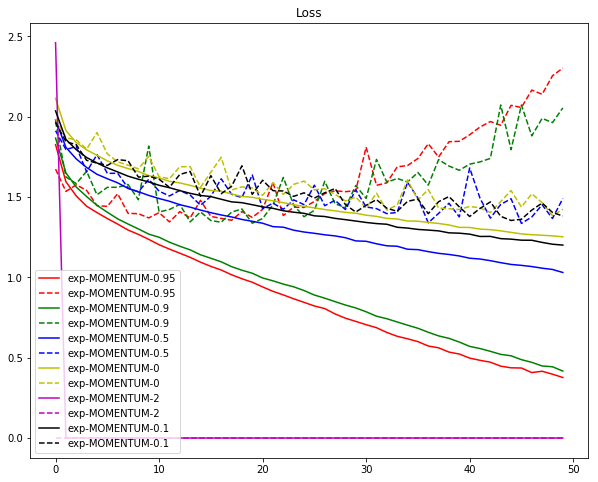

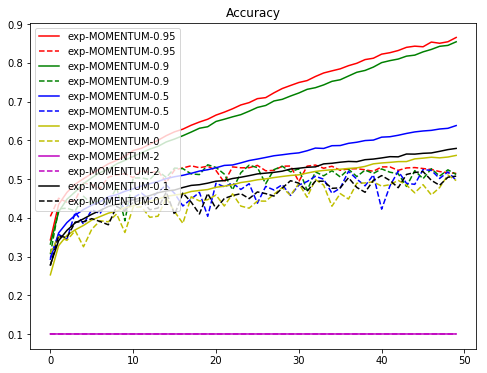

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()